        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

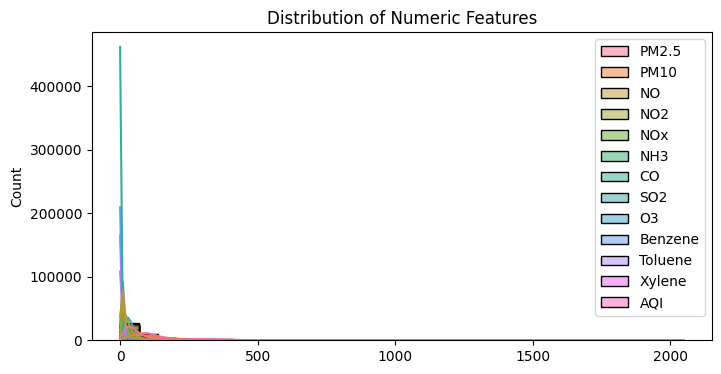

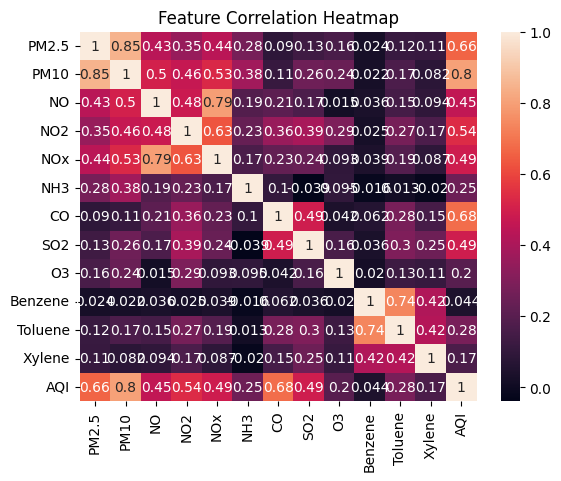

In [11]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# 2. Load dataset from specified path
df = pd.read_csv(r"C:\Users\sindh\Downloads\air_quality_data.csv")

# 3. Data wrangling & EDA
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 4. Visualize dataset
plt.figure(figsize=(8, 4))
sns.histplot(df.select_dtypes('number'), bins=30, kde=True)
plt.title("Distribution of Numeric Features")
plt.show()

# Plot heatmap for correlation only among numeric columns
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
# 5. Split dataset
target = "PM2.5"
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]

# Select numeric columns only for modeling
numeric_cols = X.select_dtypes(include='number').columns
X_numeric = X.loc[:, numeric_cols]

# Fill missing numeric values in features
X_numeric = X_numeric.fillna(X_numeric.mean())

# Remove samples with missing target values to avoid errors
not_null_idx = y.notnull()
X_numeric = X_numeric.loc[not_null_idx]
y = y.loc[not_null_idx]

# Scale numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Build and train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 7. Predict on test data
y_pred = model.predict(X_test)

# 8. Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")

# 9. Predict on new sample
new_data = X_numeric.iloc[[0]]  # use numeric columns only
new_data_scaled = scaler.transform(new_data)
new_pred = model.predict(new_data_scaled)
print(f"Predicted PM2.5 for new sample: {new_pred[0]:.2f}")

# 10. Optional Hyperparameter Tuning
params = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validated R^2:", grid.best_score_)


Test MSE: 776.60
Test R^2: 0.82
Predicted PM2.5 for new sample: 70.77
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validated R^2: 0.8172722852803508
